# Predicting Bankruptcy in Taiwan

Data card: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

6819 companies and 96 attributes

In [1]:
# Importing libraries 
import pickle

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split

## Prep the Data

### Import

In [2]:
# Loading the data file
taiwan_data = pd.read_csv("/Users/susiechen/Desktop/WQU/Project_4/data.csv")

In [3]:
taiwan_data.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [4]:
#Inspecting dataframe and get column names
taiwan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

We know all the data is numerical and that there are no missing data

### Explore

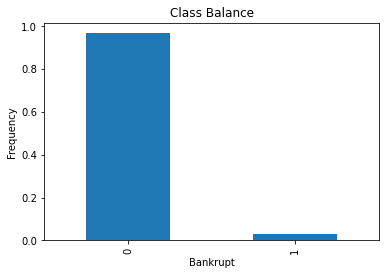

In [5]:
# Looking to see if data is imbalanced, 0 is negative class meaning companies that did not go bankrupt, 1 is the positive/opposite class
taiwan_data["Bankrupt?"].value_counts(normalize=True).plot(
    kind = "bar",
    xlabel = "Bankrupt",
    ylabel = "Frequency",
    title = "Class Balance"
);

Looks like most of the companies in our dataset are doing all right for themselves, However, it also shows us that we have an imbalanced dataset, where our majority class is far bigger than our minority class. Data is highly imbalanced, will need to resample later. 

### Split

In [6]:
# Creating my feature matrix and target vector 
target = "Bankrupt?"
X = taiwan_data.drop(columns=target)
y = taiwan_data[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


To ensure that the model can generalize, we need to put aside a test set that we'll use to evaluate our model once it's trained.

In [7]:
# Dividing dataset into training and test sets using a randomized split with test set being 20% of the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


Hyperparams tuning would take place, but we will use cross validation instead. 

### Resample

In [8]:
# Creating a new feature matrix and target vector by performing random over-sampling on the training data
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("Shape:", X_train_over.shape)
X_train_over.head()

Shape: (10572, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


In [9]:
# Checking resample is successful
y_train_over.value_counts(normalize=True)

0    0.5
1    0.5
Name: Bankrupt?, dtype: float64

In [10]:
# Ensuring X_train_over has the same columns as the original X_train
X_test = X_test[X_train.columns]

## Build Model

### Baseline

In [11]:
#Baseline score for model
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.969


### Iterate

In [12]:
# Creating and training the classifier on the oversampled data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=42)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [13]:
# Performing cross-validation with your classifier using the over-sampled training data
cv_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_scores)

[0.99338061 0.99432624 0.99432356 0.99668874 0.99432356]


In [14]:
# Creating a dictionary with the range of hyperparameters to evaluate for the classifier
params = {
    "n_estimators": range(25, 100, 25),
    "max_depth": range(10, 50, 10)
}

In [15]:
# Creating a GridSearchCV named "model" that includes the classifer and hyperparameter grid 
model = model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [16]:
# Fitting the model to the over-sampled training data 
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [17]:
# Extracting the cross-validation results from the model and putting the results in a DF
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.634270,0.021305,0.011436,0.003406,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.979196,0.977778,0.980132,0.978713,0.979659,0.979096,0.000811,11
1,1.179658,0.023720,0.018882,0.002307,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.979669,0.979196,0.980132,0.979186,0.979186,0.979474,0.000378,10
2,1.850234,0.038660,0.020906,0.000491,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.979196,0.980142,0.977294,0.979659,0.978713,0.979001,0.000977,12
3,0.735617,0.015884,0.010426,0.003196,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.985816,0.985816,0.990066,0.988647,0.988647,0.987798,0.001700,9
4,1.436670,0.008309,0.016843,0.001615,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.987234,0.987707,0.989120,0.990066,0.987701,0.988366,0.001060,8


In [18]:
# Extracting the best hyperparams from the model 
best_params = model.best_params_
print(best_params)

{'max_depth': 40, 'n_estimators': 50}


### Evaluate

In [19]:
# Testing the quality of the model by calculating accuracy scores for the training and test data
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Model Training Accuracy:", round(acc_train, 4))
print("Model Test Accuracy:", round(acc_test, 4))

Model Training Accuracy: 1.0
Model Test Accuracy: 0.9663


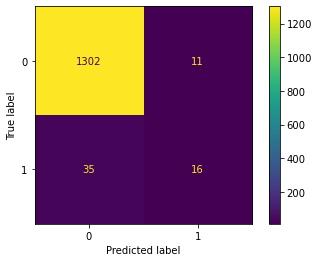

In [20]:
# Plotting a confusion matrix showing how the model performed on the test set
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [21]:
# Generating a classification report for the model's performance on the test data
class_report = classification_report(y_test, model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.59      0.31      0.41        51

    accuracy                           0.97      1364
   macro avg       0.78      0.65      0.70      1364
weighted avg       0.96      0.97      0.96      1364



# Communication

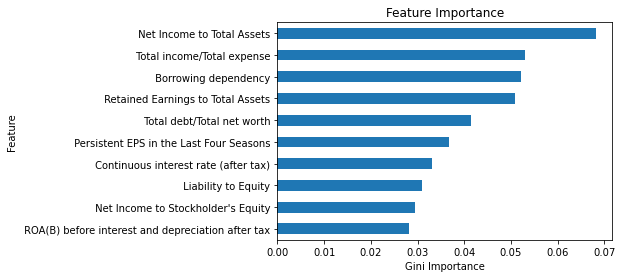

In [22]:
# For non technical audience 
# Creating a horizontal bar chart with the 10 most important features for the model

# Get feature names from training data
features = X_train_over.columns

# Extract importances from model
importances = model.best_estimator_.feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()

# Plot 10 most important features for non-technical audience
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [23]:
# Saving model to a file for collaboration between technical audience/users
with open("final-model.pkl", "wb",) as f:
    pickle.dump(model, f)

Run '%load predictor.py' to see the script

The script is below

In [24]:
# %load predictor.py
import pandas as pd
import pickle

def make_predictions(data_filepath, model_filepath):
    """Generate predictions from the provided model and data file."""
    # Load data
    X_test = pd.read_csv(data_filepath)
    # Load model
    with open(model_filepath, "rb") as f:
        model = pickle.load(f)
    # Generate predictions
    y_test_pred = model.predict(X_test.values)
    # Put predictions into Series with same index as X_test ("Bankrupt?")
    y_test_pred = pd.Series(y_test_pred, index=X_test.index, name="Bankrupt?")
    return y_test_pred